In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Watermark is not required for this code, but is included for information. 
import watermark
%load_ext watermark
%watermark -a "ELEANOR LUTZ" -d -v -iv -m

pandas     0.23.4
matplotlib 3.0.3
cartopy    0.17.0
numpy      1.15.4
watermark  1.8.1
ELEANOR LUTZ 2019-07-11 

CPython 3.7.1
IPython 7.2.0

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
CPU cores  : 12
interpreter: 64bit


## Code Description

This code makes reference plots to use when illustrating individual asterisms. These illustrated drawings can be found in the bottom right of the [finished map](http://tabletopwhale.com/img/posts/19-07-15.jpg). The original map uses [Western Constellation lines](http://hemel.waarnemen.com/download/#cetera) by Marc van der Sluys, but this code file uses the same Stellarium asterism data as in `2_process_asterism_data`.

In [3]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
stars = stars[stars['mag'] <= 6.5]
asterisms = pd.read_csv('./data/processed/asterisms.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
names = ['Scorpius', 'Cancer', 'Corona Borealis', 'Crater', 
         'Lepus', 'Gemini', 'Cygnus', 'Sagittarius']
gap = 30

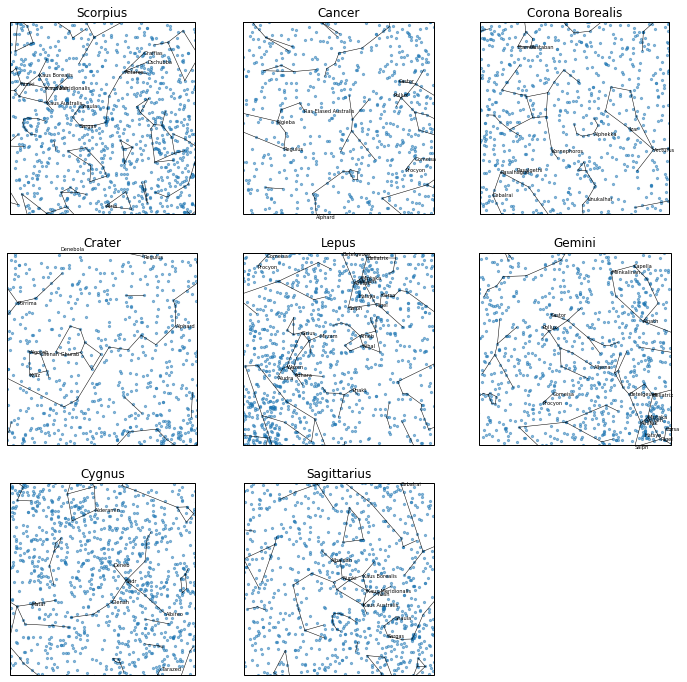

In [4]:
fig = plt.figure(figsize=(12, 12))

for i, name in enumerate(names): 
    valdf = const_names[const_names['name'] == name]
    clon = 360/24*valdf['ra'].tolist()[0]
    clat = valdf['dec'].tolist()[0]

    ax = fig.add_subplot(np.ceil(np.sqrt(len(names))), np.ceil(np.sqrt(len(names))), i+1, 
                         projection=ccrs.Orthographic(central_longitude=clon, central_latitude=clat)) 
    ax.set_extent([clon-gap, clon+gap, clat+gap, clat-gap], ccrs.PlateCarree())
    for index, row in asterisms.iterrows():
        ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
        decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
        for n in range(int(len(asterisms)/2)):
            ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color='k', lw=0.5)

    ax.set_title(name)
    ax.scatter(360/24*stars['ra'], stars['dec'], transform=ccrs.Geodetic(), s=5, alpha=0.5)
    stars_names = stars[pd.notnull(stars['proper'])]
    stars_names = stars_names[stars_names['dec'].between(clat-gap, clat+gap)]
    stars_names = stars_names[stars_names['ra'].between((clon-gap)/(360/24), (clon+gap)/(360/24))]
    for index, row in stars_names.iterrows():
        ax.text(360/24*row['ra'], row['dec'], row['proper'], ha='left', va='center', 
                transform=ccrs.Geodetic(), fontsize=5)
        
    ax.set_xlim(ax.get_xlim()[::-1])
    
plt.show()
plt.savefig("./figures/references.png", format='png', transparent=True)
plt.clf()
plt.close('all')